In [6]:
# This is a collectin of useful packages for this exercise. In the example file, not many are used. Feel free to check the documentation to see if and what can be of help.

import sys
print(sys.version)
import time

# Remove / suppress some warnings
import warnings
warnings.filterwarnings('ignore')

# Numerik / DataFrames
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
from matplotlib.ticker import MaxNLocator
import pylab as p
import seaborn as sns

# Data preparation
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# Explainability options, not required for assignment, only for examples at the very end
# import shap
# from sklearn.inspection import plot_partial_dependence
# import lime
# import lime.lime_tabular
# import lime.lime_image

# Natural language processing
# from wordcloud import WordCloud
# import gensim
# from gensim.utils import simple_preprocess
# import nltk
# import gensim.corpora as corpora

# stopwords, stemming
#nltk.download('stopwords') # start the NLTK Downloader and download the stopwords
# from nltk.corpus import stopwords 
# from nltk.stem import PorterStemmer
# import pyLDAvis
# import pyLDAvis.gensim_models

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

In [8]:

df = pd.read_csv('train.csv', parse_dates=['Meldedatum', 'Ereignisdatum'])

## Alteration of Variable

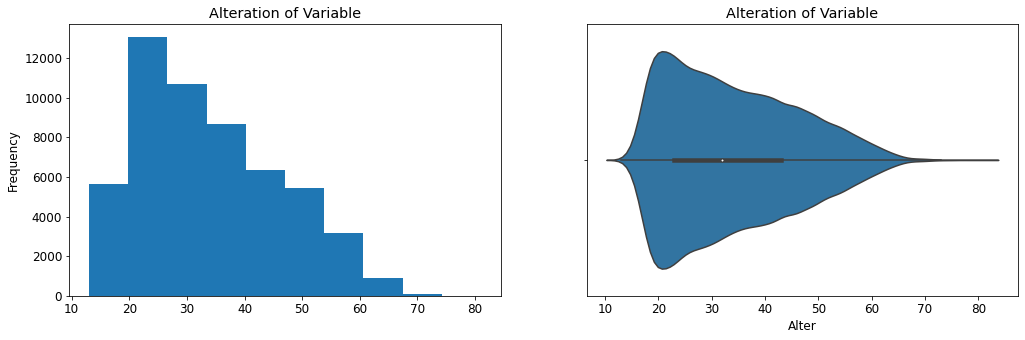

In [9]:
plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.title('Alteration of Variable')
df['Alter'].plot(kind='hist')
plt.subplot(1, 2, 2)
plt.title('Alteration of Variable')
sns.violinplot(df['Alter']);

### Mean value is 30 y old, and the data is right distributed, there are also some outlier in data between 70 and 80,

## Variable Kinder

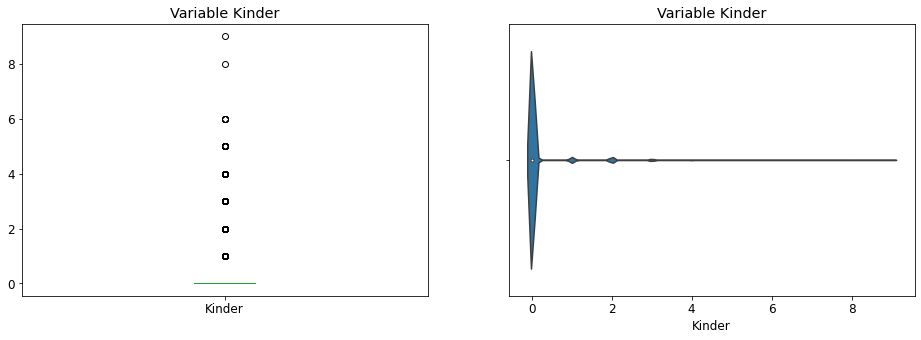

In [10]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
plt.title('Variable Kinder')
df['Kinder'].plot(kind='box')
plt.subplot(1, 2, 2)
plt.title('Variable Kinder')
sns.violinplot(df['Kinder']);

## Variable AndereHausstandsmitglieder

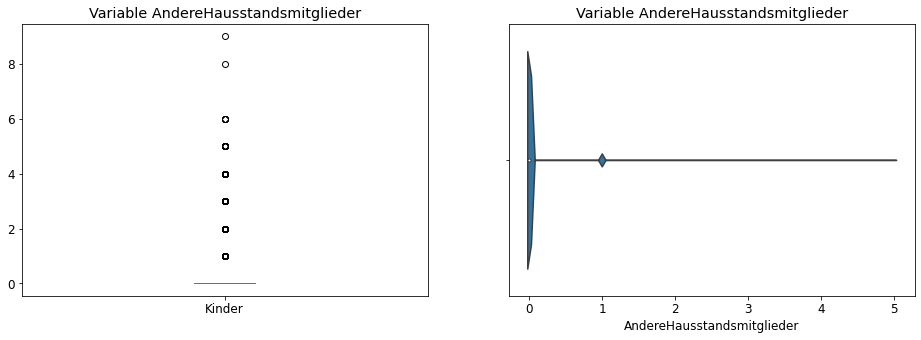

In [11]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
plt.title('Variable AndereHausstandsmitglieder')
df['Kinder'].plot(kind='box')
plt.subplot(1, 2, 2)
plt.title('Variable AndereHausstandsmitglieder')
sns.violinplot(df['AndereHausstandsmitglieder']);

## Variable LohnWoche:

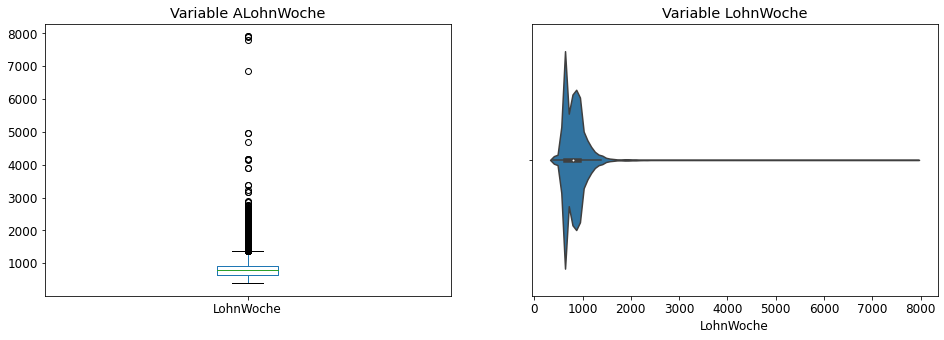

In [12]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
plt.title('Variable ALohnWoche')
df['LohnWoche'].plot(kind='box')
plt.subplot(1, 2, 2)
plt.title('Variable LohnWoche')
sns.violinplot(df['LohnWoche']);

## Variable Erstreserve

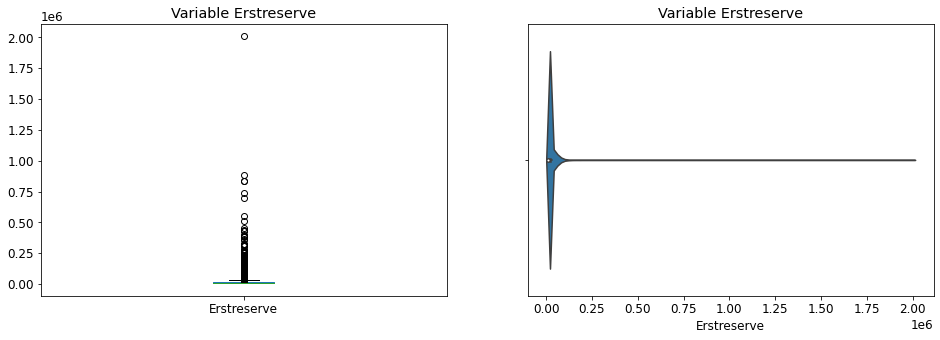

In [13]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
plt.title('Variable Erstreserve')
df['Erstreserve'].plot(kind='box')
plt.subplot(1, 2, 2)
plt.title('Variable Erstreserve')
sns.violinplot(df['Erstreserve']);

## Variable Endkosten

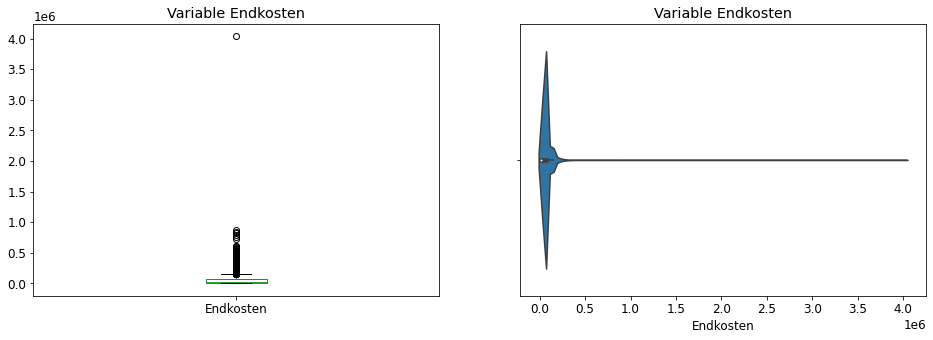

In [14]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
plt.title('Variable Endkosten')
df['Endkosten'].plot(kind='box')
plt.subplot(1, 2, 2)
plt.title('Variable Endkosten')
sns.violinplot(df['Endkosten']);

In [15]:
df.corr()

,Unnamed: 0,Alter,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitwoche,ArbeitstageWoche,Erstreserve,Endkosten
Unnamed: 0,1.000000,0.004429,-0.002706,0.002636,-0.000463,-0.003344,-0.000122,0.007395,0.002732
Alter,0.004429,1.000000,0.064209,0.037479,0.176073,0.017311,0.031966,0.114698,0.094529
Kinder,-0.002706,0.064209,1.000000,0.197231,0.100953,0.035952,0.012861,0.044017,0.026052
AndereHausstandsmitglieder,0.002636,0.037479,0.197231,1.000000,0.057868,0.009795,0.004481,0.045100,0.018420
LohnWoche,-0.000463,0.176073,0.100953,0.057868,1.000000,0.175349,0.206063,0.181381,0.129040
Arbeitszeitwoche,-0.003344,0.017311,0.035952,0.009795,0.175349,1.000000,0.399353,0.008122,0.012556
ArbeitstageWoche,-0.000122,0.031966,0.012861,0.004481,0.206063,0.399353,1.000000,0.007574,0.010414
Erstreserve,0.007395,0.114698,0.044017,0.045100,0.181381,0.008122,0.007574,1.000000,0.286252
Endkosten,0.002732,0.094529,0.026052,0.018420,0.129040,0.012556,0.010414,0.286252,1.000000


In [16]:
### The most correlated variable to endcosten in erstereserve with 28% followed by Lohnwoche

## Exercise 2: The primary target variable is Endkosten. Build a regression model that estimates Endkosten from the dependent variables. Use the root mean square measure to test the performance. Try to get close to  𝑟𝑚𝑠𝑒<1

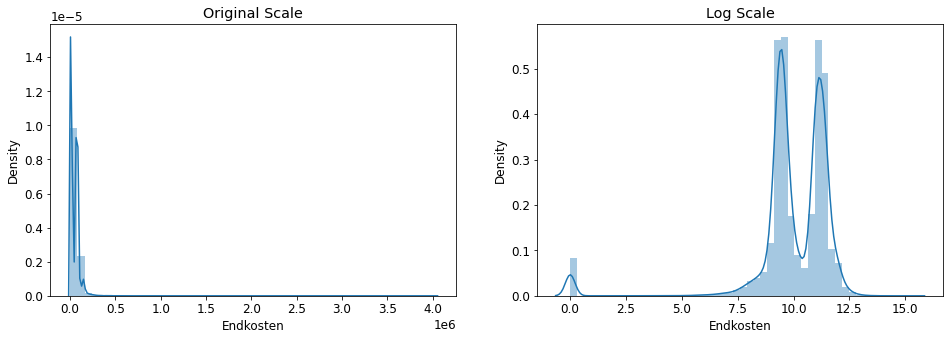

In [17]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
plt.title('Original Scale')
sns.distplot(df['Endkosten'])
plt.subplot(1, 2, 2)
plt.title('Log Scale')
sns.distplot(np.log1p(df['Endkosten']));

In [18]:
# Inputation
print(df.isna().any().sum())
df['Familienstand'].fillna('U', inplace = True)
df['Familienstand'].fillna('U', inplace = True)
#Check
print(df.isna().any().sum())

1
0


In [19]:
df.head(5)

,Unnamed: 0,ID,Ereignisdatum,Meldedatum,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Schadenbeschreibung,Erstreserve,Endkosten
0,6979,WC8607959,2003-12-31 14:00:00+00:00,2004-01-29 00:00:00+00:00,21,M,S,0,0,909.351717,P,20.0,4,STRUCK HAMMER BRUISED LEFT LEG,8436.167102,0.000000
1,12975,WC7477367,2000-06-29 08:00:00+00:00,2000-10-29 00:00:00+00:00,16,M,S,0,0,635.562035,F,40.0,5,LADDER SLIPPED AND HIT ANKLE SPRAIN LEFT ANKLE,8372.177085,14051.245443
2,19669,WC5586276,1996-10-14 10:00:00+00:00,1997-04-10 00:00:00+00:00,37,F,S,0,0,791.829150,F,38.0,5,LIFTING PARCEL STRAIN NECK AND SHOULDERS NECK ...,12023.847580,72608.071751
3,38404,WC9230570,2004-12-31 09:00:00+00:00,2005-01-10 00:00:00+00:00,44,M,S,0,0,916.424284,F,38.0,5,MOVING STRAIN LOWER BACK STRAIN,16373.536019,63075.572628
4,45414,WC8670450,2003-02-27 10:00:00+00:00,2003-11-01 00:00:00+00:00,54,M,M,0,0,928.223434,F,38.0,5,PARTICLE IN EYE FOREIGN BODY RIGHT EYE,8510.012175,87882.990895


In [20]:
df['time_gap']=df['Meldedatum']-df['Ereignisdatum']
df['time_gap']=df['time_gap'].dt.days.astype('int16')

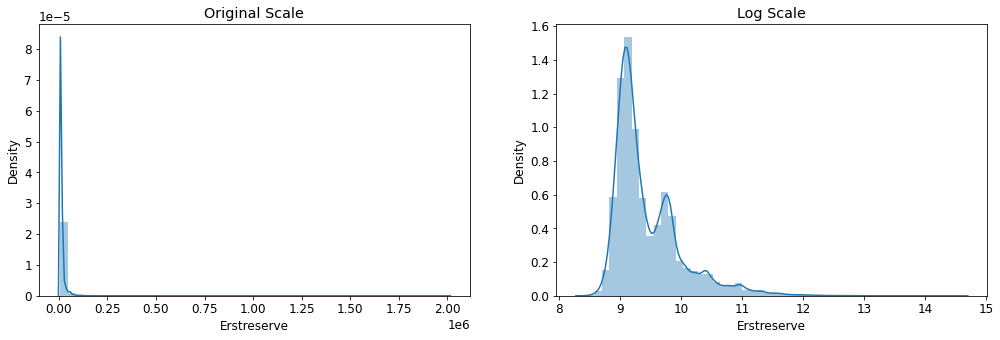

In [21]:
# Verteilung Initial Incurred Claims cost
plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.title('Original Scale')
sns.distplot(df['Erstreserve'])
plt.subplot(1, 2, 2)
plt.title('Log Scale')
sns.distplot(np.log1p(df['Erstreserve']));

### on the log scale Erstreserve variable is approximately normally distributed around two values with mean on 9 and 9.7

In [22]:
# Data preparation
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
#differentiating between numerical and categorical variables.
numerical_features = [c for c in df.columns if df[c].dtype in ['float64', 'int64', 'int16'] if c not in ["Ereignisdatum","Meldedatum", "ID", "Schadenbeschreibung"]]
categorical_features = [c for c in df.columns if c not in numerical_features if c not in ["Ereignisdatum","Ereignisdatum", "ID", "Schadenbeschreibung"]]
numerical_features, categorical_features

# Note: You may need to change some params to obtain the intended standardization
std = StandardScaler() #scikit-learn
df[numerical_features] = std.fit_transform(df[numerical_features])
df[numerical_features].head(3)

,Unnamed: 0,Alter,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitwoche,ArbeitstageWoche,Erstreserve,Endkosten,time_gap
0,-1.284316,-1.059422,-0.230187,-0.090944,0.307795,-1.411064,-1.640500,-0.351817,-0.920852,-0.168918
1,-0.899672,-1.471894,-0.230187,-0.090944,-0.791729,0.180204,0.170688,-0.354920,-0.630231,1.352899
2,-0.470252,0.260486,-0.230187,-0.090944,-0.164169,0.021078,0.170688,-0.177816,0.580899,2.269261


In [23]:
#import libraries
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
#split data frame on categorical and numerical variables
X = df.drop(['Unnamed: 0','ID','Schadenbeschreibung'],axis=1)
y = target = np.log1p(df['Endkosten'])
#split data on categorical and numerical variables
X_pre_enc = df[['Geschlecht','Familienstand','Arbeitszeitkategorie']]
#X_schadenjahr = pd.DataFrame(np.array(list((map(lambda x: x.Meldedatum,np.array(train_df['Ereignisdatum']))))),columns=['Jahr']) # Aus den Claim-Datumsangaben das Jahr extrahieren
X_num = df.drop(['Meldedatum','Ereignisdatum','Geschlecht','Familienstand','Arbeitszeitkategorie'],axis=1)


# Encode Categoricals variables

enc = OneHotEncoder(handle_unknown='ignore')
fit = enc.fit(X_pre_enc)
X_post_enc = pd.DataFrame(enc.transform(X_pre_enc).toarray(),columns=enc.get_feature_names())
X = X_num.join(X_post_enc)
X = X.drop(['Unnamed: 0','ID','Schadenbeschreibung','Endkosten'],axis=1)

In [24]:
X

,Alter,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitwoche,ArbeitstageWoche,Erstreserve,time_gap,x0_F,x0_M,x0_U,x1_M,x1_S,x1_U,x2_F,x2_P
0,-1.059422,-0.230187,-0.090944,0.307795,-1.411064,-1.640500,-0.351817,-0.168918,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.471894,-0.230187,-0.090944,-0.791729,0.180204,0.170688,-0.354920,1.352899,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.260486,-0.230187,-0.090944,-0.164169,0.021078,0.170688,-0.177816,2.269261,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.837946,-0.230187,-0.090944,0.336198,0.021078,0.170688,0.033142,-0.479826,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.662889,-0.230187,-0.090944,0.383583,0.021078,0.170688,-0.348235,3.398350,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,0.837946,-0.230187,-0.090944,-0.834586,0.021078,0.170688,-0.350306,-0.218009,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
53996,1.415406,-0.230187,-0.090944,-1.659151,0.021078,0.170688,-0.002554,0.501991,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
53997,-1.224411,-0.230187,-0.090944,1.289939,3.362742,0.170688,0.849606,-0.528917,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
53998,1.250418,-0.230187,-0.090944,-1.698114,0.180204,0.170688,-0.340013,-0.332554,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
y

0       -2.536439
1       -0.994876
2        0.457994
3        0.324789
4        0.640184
           ...   
53995   -1.165509
53996    0.234980
53997   -0.215791
53998    0.365202
53999   -1.169497
Name: Endkosten, Length: 54000, dtype: float64

In [26]:
# square root transformation for Endkosten variable
df_scaled['Endkosten_sqrt']=df_scaled['Endkosten'].apply(lambda x:np.sqrt(x))

NameError: name 'df_scaled' is not defined

In [27]:
from sklearn.linear_model import LinearRegression
y = df_scaled.pop("Endkosten_sqrt")
X = df_scaled.drop(["ID", "Ereignisdatum","Meldedatum", "Geschlecht","Familienstand","Arbeitszeitkategorie", "Schadenbeschreibung" ], axis=1)
model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

NameError: name 'df_scaled' is not defined

In [28]:
from sklearn.metrics import mean_squared_error
y_predicted = model.predict(X)
rmse = mean_squared_error(y, y_predicted, squared=True)
rmse

NameError: name 'model' is not defined

### Exercise 3: The insurance company's policy states that any claim above 25.000 is a "major claim". It would be very helpful to know in advance, judging from the initial claims report data (as obtained from train.csv), if a claim will be major. Train a classification model that differentiates between minor and major claims (from "Endkosten") with good accuracy (precision > 0.85). Ignore the description column "Schadenbeschreibung" for now.

In [29]:
df = pd.read_csv('train.csv', parse_dates=['Meldedatum', 'Ereignisdatum'])

In [30]:
# big claims
df['big_claim'] = df.apply(lambda x: 1 if x.Endkosten > 25000 else 0, axis=1)

In [31]:
cols = {
    'Ereignisdatum',
    'Meldedatum',
    'Alter',
    'Geschlecht',
    'Familienstand',
    'Kinder',
    'AndereHausstandsmitglieder',
    'LohnWoche',
    'Arbeitszeitkategorie',
    'Arbeitszeitwoche',
    'ArbeitstageWoche',
    'Schadenbeschreibung',
    'Erstreserve',
    'Endkosten'
}

cols_numeric = ['Alter', 'Kinder', 'AndereHausstandsmitglieder', 'LohnWoche', 'Arbeitszeitwoche',
                'ArbeitstageWoche', 'Erstreserve']
              
cols_categorical = ['Geschlecht', 'Familienstand', 'Arbeitszeitkategorie']

In [32]:
#Log transformation for variables.
df['Erstreserve_log'] = np.log1p(df['Erstreserve'])
cols_numeric.append('Erstreserve_log')
df['Endkosten_log'] = np.log1p(df['Endkosten'])
#cols_numeric.append('Endkosten_log')
df['LohnWoche_log'] = np.log1p(df['LohnWoche'])
cols_numeric.append('LohnWoche_log')
df['Arbeitszeitwoche_log'] = np.log1p(df['Arbeitszeitwoche'])
cols_numeric.append('Arbeitszeitwoche_log')
df['ArbeitstageWoche_log'] = np.log1p(df['ArbeitstageWoche'])
cols_numeric.append('ArbeitstageWoche_log')

In [33]:
df['time_gap'] = df['Meldedatum'] - df['Ereignisdatum']
cols_numeric.append('time_gap')

In [34]:
#year of accident is somewhat important
df['year'] = df.apply(lambda x: x.Ereignisdatum.year, axis=1)
cols_numeric.append('year')

In [35]:
df['Age'] = df.apply(lambda x: 'above_25' if x.Alter >= 25 else 'under_25', axis=1)
cols_categorical.append('Age')

In [36]:
df['ArbeitstageWoche_cat'] = df['ArbeitstageWoche'].astype(str)
cols_categorical.append('ArbeitstageWoche_cat')

In [37]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [38]:
X, y = df[cols_categorical], df['big_claim']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [39]:
reg = xgb.XGBClassifier()
grid_params = {
    'n_estimators' : [50],
    'max_depth' : [2,5],
    'min_child_weight' : [2],
    'colsample_bylevel': [0.3,0.7], 
    'colsample_bynode': [0.2,.9], 
    'colsample_bytree': [1,5,10], 
    'subsample': [1,8], 
    
}


gboost = GridSearchCV(estimator=reg,
                 param_grid=grid_params,
                 scoring='precision',
                 n_jobs=-1, verbose=1,
                 cv=2,
                 return_train_score=True)

gboost = gboost.fit(X_train, y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[17:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
print(gboost.best_params_)

model = gboost.best_estimator_
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

{'colsample_bylevel': 0.7, 'colsample_bynode': 0.2, 'colsample_bytree': 1, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 50, 'subsample': 1}
[17:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.77      0.64      5678
           1       0.52      0.27      0.36      5122

    accuracy                           0.54     10800
   macro avg       0.53      0.52      0.50     10800
weighted avg       0.53      0.54      0.50     10800



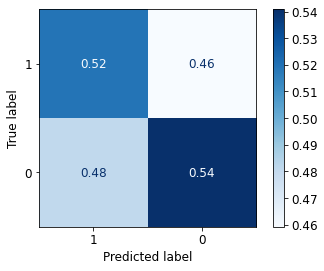

In [42]:
plot_confusion_matrix(model, X_test, y_test, normalize='pred', labels=[1, 0], cmap=plt.cm.Blues)  
plt.show()

### Exercise 4: The company wants to test another approach that uses the hypothesis that only the 1% largest claims should be consired major claims. Train a new classifier that is based on the segmentation of claims into major claims based on the 99% threshold.

In [43]:
y= df.apply(lambda x: 1 if x.Endkosten > np.quantile(df['Endkosten'],0.99) else 0, axis=1)

In [44]:
#to deal with the unmbalance in the data we use a SMOTE strategy for resampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X1, y1 = smote.fit_resample(X, y)

In [45]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

In [46]:
reg = xgb.XGBClassifier()
grid_params = {
    'n_estimators' : [50],
    'max_depth' : [2,5],
    'min_child_weight' : [2],
    'colsample_bylevel': [0.3,0.7], 
    'colsample_bynode': [0.2,.9], 
    'colsample_bytree': [1,5,10], 
    'subsample': [1,8], 
    
}


gboost = GridSearchCV(estimator=reg,
                 param_grid=grid_params,
                 scoring='precision',
                 n_jobs=-1, verbose=1,
                 cv=2,
                 return_train_score=True)

gboost = gboost.fit(X1_train, y1_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[17:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
print(gboost.best_params_)

model = gboost.best_estimator_
model.fit(X1_train, y1_train)

y1_pred=model.predict(X1_test)

{'colsample_bylevel': 0.3, 'colsample_bynode': 0.2, 'colsample_bytree': 1, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 50, 'subsample': 1}
[17:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.61      0.47      0.53     10692
           1       0.57      0.70      0.63     10692

    accuracy                           0.58     21384
   macro avg       0.59      0.58      0.58     21384
weighted avg       0.59      0.58      0.58     21384



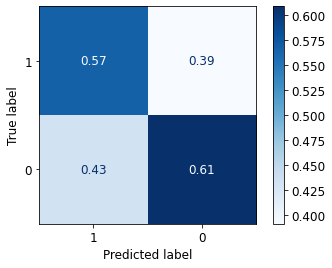

In [49]:
plot_confusion_matrix(model, X1_test, y1_test, normalize='pred', labels=[1, 0], cmap=plt.cm.Blues)  
plt.show()

## Exercise 5: Improve your models from exercise 3/4 making use of the description column Schadenbeschreibung. A good model should give a score > 0.9, excellent models exhibit scores > 0.95.

## Exercice 3

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')
dtm=tfidf.fit_transform(df['Schadenbeschreibung'])
dtm

<54000x2417 sparse matrix of type '<class 'numpy.float64'>'
	with 296747 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=20, random_state=42)
nmf_model.fit(dtm)

NMF(n_components=20, random_state=42)

In [52]:
for index,topic in enumerate(nmf_model.components_):
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

['repetitive', 'tyres', 'box', 'trailer', 'upper', 'neck', 'parts', 'shoulder', 'lifting', 'strain']


['lacerated', 'fractured', 'fracture', 'crushed', 'little', 'ring', 'caught', 'middle', 'index', 'finger']


['struck', 'dust', 'grinder', 'particle', 'cornea', 'metal', 'grinding', 'eye', 'body', 'foreign']


['redback', 'playing', 'steel', 'forearm', 'fracture', 'leg', 'roller', 'tendonitis', 'shoulder', 'right']


['splinter', 'infection', 'beam', 'steel', 'cleaning', 'pallet', 'leg', 'forearm', 'shoulder', 'left']


['strain', 'carrying', 'truck', 'leg', 'digging', 'pulling', 'tyres', 'bending', 'pain', 'lower']


['splinter', 'hot', 'burned', 'puncture', 'bruising', 'jammed', 'wound', 'caught', 'burn', 'hand']


['twisted', 'resident', 'heavy', 'muscle', 'neck', 'boxes', 'upper', 'shoulder', 'lifting', 'strained']


['eye', 'stairs', 'cornea', 'using', 'tendonitis', 'lathe', 'roller', 'wet', 'floor', 'slipped']


['penetrating', 'struck', 'repetitive', 'caught', 'thumb', 'lifting

In [53]:
event_categ = nmf_model.transform(dtm)
event_categ.argmax(axis=1)
df['event_categ'] = event_categ.argmax(axis=1)

In [54]:
df['huge_claim'] = df.apply(lambda x: 1 if x.Endkosten > 25000 else 0, axis=1)

In [55]:
small_claim=[1,4,5,6]
medium_claim=[7]
huge_claim=[0,2,3]

def topic_mapper(s):
    if s in small_claim:
        return 'small'
    elif s in medium_claim:
        return 'medium'
    else:
        return 'huge'

In [56]:
df['event_categ']=df['event_categ'].apply(lambda x:topic_mapper(x))

In [57]:
categorical_features = [c for c in df.columns if df[c].dtype in ['object']  if c not in ['Unnamed: 0',"Ereignisdatum","Meldedatum", "ID", "Schadenbeschreibung"]]
Ncategorical_features = [c for c in df.columns if c not in categorical_features if c not in ['Unnamed: 0',"Ereignisdatum","Meldedatum", "ID"]]

In [58]:
X_enc=pd.get_dummies(df[categorical_features])
X_enc2=pd.get_dummies(df['event_categ'])
X_ncateg=df[Ncategorical_features]
Xprime = X_ncateg.join(X_enc)
X=Xprime.join(X_enc2)

In [59]:
X.head()

,Alter,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitwoche,ArbeitstageWoche,Schadenbeschreibung,Erstreserve,Endkosten,big_claim,...,ArbeitstageWoche_cat_4,ArbeitstageWoche_cat_5,ArbeitstageWoche_cat_6,ArbeitstageWoche_cat_7,event_categ_huge,event_categ_medium,event_categ_small,huge,medium,small
0,21,0,0,909.351717,20.0,4,STRUCK HAMMER BRUISED LEFT LEG,8436.167102,0.000000,0,...,1,0,0,0,1,0,0,1,0,0
1,16,0,0,635.562035,40.0,5,LADDER SLIPPED AND HIT ANKLE SPRAIN LEFT ANKLE,8372.177085,14051.245443,0,...,0,1,0,0,1,0,0,1,0,0
2,37,0,0,791.829150,38.0,5,LIFTING PARCEL STRAIN NECK AND SHOULDERS NECK ...,12023.847580,72608.071751,1,...,0,1,0,0,1,0,0,1,0,0
3,44,0,0,916.424284,38.0,5,MOVING STRAIN LOWER BACK STRAIN,16373.536019,63075.572628,1,...,0,1,0,0,1,0,0,1,0,0
4,54,0,0,928.223434,38.0,5,PARTICLE IN EYE FOREIGN BODY RIGHT EYE,8510.012175,87882.990895,1,...,0,1,0,0,1,0,0,1,0,0


In [60]:
X=X.drop(['huge_claim'],axis=1)
X=X.drop(['Schadenbeschreibung'],axis=1)
X=X.drop(['time_gap'],axis=1)
X=X.drop(['Endkosten'],axis=1)
X=X.drop(['Endkosten_log'],axis=1)

In [61]:
y=df.huge_claim

In [62]:
X=X.drop(['big_claim'],axis=1)

In [63]:
X.columns

Index(['Alter', 'Kinder', 'AndereHausstandsmitglieder', 'LohnWoche',
       'Arbeitszeitwoche', 'ArbeitstageWoche', 'Erstreserve',
       'Erstreserve_log', 'LohnWoche_log', 'Arbeitszeitwoche_log',
       'ArbeitstageWoche_log', 'year', 'Geschlecht_F', 'Geschlecht_M',
       'Geschlecht_U', 'Familienstand_M', 'Familienstand_S', 'Familienstand_U',
       'Arbeitszeitkategorie_F', 'Arbeitszeitkategorie_P', 'Age_above_25',
       'Age_under_25', 'ArbeitstageWoche_cat_1', 'ArbeitstageWoche_cat_2',
       'ArbeitstageWoche_cat_3', 'ArbeitstageWoche_cat_4',
       'ArbeitstageWoche_cat_5', 'ArbeitstageWoche_cat_6',
       'ArbeitstageWoche_cat_7', 'event_categ_huge', 'event_categ_medium',
       'event_categ_small', 'huge', 'medium', 'small'],
      dtype='object')

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [65]:
reg = xgb.XGBClassifier()
grid_params = {
    'n_estimators' : [50],
    'max_depth' : [2,5],
    'min_child_weight' : [2],
    'colsample_bylevel': [0.3,0.7], 
    'colsample_bynode': [0.2,.9], 
    'colsample_bytree': [1,5,10], 
    'subsample': [1,8], 
    
}


gboost = GridSearchCV(estimator=reg,
                 param_grid=grid_params,
                 scoring='precision',
                 n_jobs=-1, verbose=1,
                 cv=2,
                 return_train_score=True)

gboost = gboost.fit(X_train, y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[17:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
print(gboost.best_params_)

model = gboost.best_estimator_
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

{'colsample_bylevel': 0.3, 'colsample_bynode': 0.2, 'colsample_bytree': 1, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 50, 'subsample': 1}
[17:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74      5687
           1       0.74      0.53      0.62      5113

    accuracy                           0.69     10800
   macro avg       0.70      0.68      0.68     10800
weighted avg       0.70      0.69      0.68     10800



## Exercice 4

In [68]:
major_claims_99pc_quantile = np.quantile(df['Endkosten'],0.99)

In [69]:
df['huge_claim'] = df.apply(lambda x: 1 if x.Endkosten > major_claims_99pc_quantile else 0, axis=1)

In [70]:
df.head()

,Unnamed: 0,ID,Ereignisdatum,Meldedatum,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,...,Endkosten_log,LohnWoche_log,Arbeitszeitwoche_log,ArbeitstageWoche_log,time_gap,year,Age,ArbeitstageWoche_cat,event_categ,huge_claim
0,6979,WC8607959,2003-12-31 14:00:00+00:00,2004-01-29 00:00:00+00:00,21,M,S,0,0,909.351717,...,0.000000,6.813831,3.044522,1.609438,28 days 10:00:00,2003,under_25,4,huge,0
1,12975,WC7477367,2000-06-29 08:00:00+00:00,2000-10-29 00:00:00+00:00,16,M,S,0,0,635.562035,...,9.550537,6.456082,3.713572,1.791759,121 days 16:00:00,2000,under_25,5,huge,0
2,19669,WC5586276,1996-10-14 10:00:00+00:00,1997-04-10 00:00:00+00:00,37,F,S,0,0,791.829150,...,11.192845,6.675608,3.663562,1.791759,177 days 14:00:00,1996,above_25,5,huge,0
3,38404,WC9230570,2004-12-31 09:00:00+00:00,2005-01-10 00:00:00+00:00,44,M,S,0,0,916.424284,...,11.052105,6.821570,3.663562,1.791759,9 days 15:00:00,2004,above_25,5,huge,0
4,45414,WC8670450,2003-02-27 10:00:00+00:00,2003-11-01 00:00:00+00:00,54,M,M,0,0,928.223434,...,11.383773,6.834349,3.663562,1.791759,246 days 14:00:00,2003,above_25,5,huge,0


In [71]:
X_enc=pd.get_dummies(df[categorical_features])
X_enc2=pd.get_dummies(df['event_categ'])
X_ncateg=df[Ncategorical_features]
Xprime = X_ncateg.join(X_enc)
X=Xprime.join(X_enc2)

In [72]:
X=X.drop(['huge_claim'],axis=1)
X=X.drop(['Schadenbeschreibung'],axis=1)
X=X.drop(['time_gap'],axis=1)
X=X.drop(['Endkosten'],axis=1)
X=X.drop(['Endkosten_log'],axis=1)
y=df.huge_claim

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X2, y2 = smote.fit_resample(X, y)

y2.value_counts()

0    53460
1    53460
Name: huge_claim, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=15, stratify=y2)

In [75]:
reg = xgb.XGBClassifier()
grid_params = {
    'n_estimators' : [50],
    'max_depth' : [2,5],
    'min_child_weight' : [2],
    'colsample_bylevel': [0.3,0.7], 
    'colsample_bynode': [0.2,.9], 
    'colsample_bytree': [1,5,10], 
    'subsample': [1,8], 
    
}


gboost = GridSearchCV(estimator=reg,
                 param_grid=grid_params,
                 scoring='precision',
                 n_jobs=-1, verbose=1,
                 cv=2,
                 return_train_score=True)

gboost = gboost.fit(X2_train, y2_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[17:16:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [76]:
print(gboost.best_params_)

model = gboost.best_estimator_
model.fit(X2_train, y2_train)

y2_pred=model.predict(X2_test)

{'colsample_bylevel': 0.7, 'colsample_bynode': 0.9, 'colsample_bytree': 1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 50, 'subsample': 1}
[17:16:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10692
           1       0.99      0.98      0.98     10692

    accuracy                           0.98     21384
   macro avg       0.98      0.98      0.98     21384
weighted avg       0.98      0.98      0.98     21384



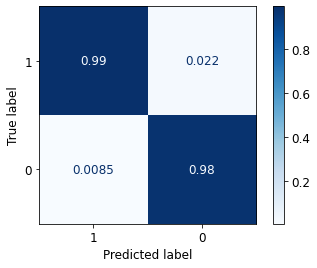

In [78]:
plot_confusion_matrix(model, X2_test, y2_test, normalize='pred', labels=[1, 0], cmap=plt.cm.Blues)  
plt.show()